In [1]:
import pandas as pd
import seaborn as sns
import geopandas
from shapely.geometry import Point, Polygon
import shapefile as shp
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load the dataset into dataframe
tweets_df = pd.read_csv('D:/development/CSDA1050/playground/twitter_jj/twitter_tweets_new.csv')

In [3]:
tweets_df = tweets_df[tweets_df['place_country']=='Canada']

In [4]:
tweets_map_df = tweets_df[tweets_df.latitude.notnull()]
tweets_map_df = tweets_map_df.filter(['id', 'latitude', 'longitude', 'tweet_date', 'tweet_text', 'coordinates'])

In [5]:
tweets_map_df.shape

(37220, 5)

In [6]:
tweets_map_df['coordinates'] = tweets_map_df[['longitude','latitude']].values.tolist()
tweets_map_df['coordinates'] = tweets_map_df['coordinates'].apply(Point)

In [7]:
crs = {'init': 'epsg:4326'}
gdf = geopandas.GeoDataFrame(tweets_map_df, crs=crs, geometry='coordinates')

In [8]:
gdf.head()

,id,latitude,longitude,tweet_date,tweet_text,coordinates
6,1107370085608538113,43.716600,-79.340700,2019-03-17 19:56:17.007,"Before and after, big different....\n.\n.\n.\n...",POINT (-79.3407 43.7166)
7,1107370127874580482,43.670060,-79.395480,2019-03-17 19:56:27.084,Simple yet Elegant. . . We love the look of wh...,POINT (-79.39548000000001 43.67006)
12,1107370170467663873,43.886417,-78.912659,2019-03-17 19:56:37.239,Some fine Irish dancing at the @BollocksBar! M...,POINT (-78.91265899999999 43.886417)
20,1107370314575405056,43.659360,-79.346680,2019-03-17 19:57:11.597,3 Bedroom Town w/ 3 Car Parking!\n#comingthisw...,POINT (-79.34668000000001 43.65936)
28,1107370446905696256,43.647437,-79.380931,2019-03-17 19:57:43.147,TD Bank is looking for teammates like you. See...,POINT (-79.3809306 43.647437)


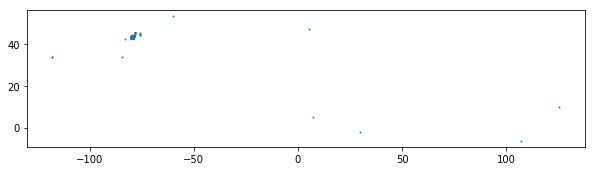

In [9]:
gdf.plot(markersize=1, figsize=(10,10))

In [10]:
gdf = gdf.to_crs({'init': 'epsg:4326'})

In [11]:
toronto = geopandas.read_file(r"D:/development/CSDA1050/playground/twitter_tweets/neighbourhoods/NEIGHBORHOODS_WGS84.shp")

In [12]:
toronto

,AREA_S_CD,AREA_NAME,geometry
0,097,Yonge-St.Clair (97),"POLYGON ((-79.39119482700001 43.681081124, -79..."
1,027,York University Heights (27),"POLYGON ((-79.505287916 43.759873494, -79.5048..."
2,038,Lansing-Westgate (38),"POLYGON ((-79.439984311 43.761557655, -79.4400..."
3,031,Yorkdale-Glen Park (31),"POLYGON ((-79.439687326 43.705609818, -79.4401..."
4,016,Stonegate-Queensway (16),"POLYGON ((-79.49262119700001 43.64743635, -79...."
5,118,Tam O'Shanter-Sullivan (118),"POLYGON ((-79.319794152 43.768363303, -79.3198..."
6,063,The Beaches (63),"POLYGON ((-79.314850871 43.666739771, -79.3135..."
7,003,Thistletown-Beaumond Heights (3),"POLYGON ((-79.577514796 43.733835422, -79.5780..."
8,055,Thorncliffe Park (55),"POLYGON ((-79.335417828 43.70319967, -79.33573..."
9,059,Danforth East York (59),"POLYGON ((-79.346273565 43.682723883, -79.3464..."


In [13]:
%matplotlib inline

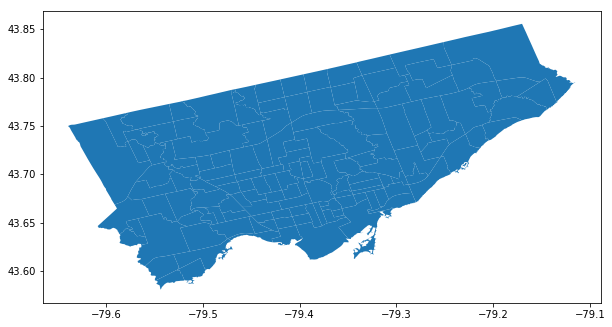

In [14]:
toronto.plot(figsize=(10,10))

In [15]:
toronto.crs

{'init': 'epsg:4326'}

In [16]:
#Convert CRS to MTM Zone 10 (https://epsg.io/7991)
toronto['geometry'] = toronto['geometry'].to_crs(epsg=7991)
gdf['coordinates']=gdf['coordinates'].to_crs(epsg=7991)

In [17]:
toronto.head()

,AREA_S_CD,AREA_NAME,geometry
0,097,Yonge-St.Clair (97),"POLYGON ((313553.5832296218 4837687.425247634,..."
1,027,York University Heights (27),"POLYGON ((304355.2553849309 4846435.13856513, ..."
2,038,Lansing-Westgate (38),"POLYGON ((309613.4023936596 4846623.978970679,..."
3,031,Yorkdale-Glen Park (31),"POLYGON ((309641.8382138504 4840408.446875989,..."
4,016,Stonegate-Queensway (16),"POLYGON ((305376.2981045488 4833943.963648436,..."


In [18]:
gdf.head()

,id,latitude,longitude,tweet_date,tweet_text,coordinates
6,1107370085608538113,43.716600,-79.340700,2019-03-17 19:56:17.007,"Before and after, big different....\n.\n.\n.\n...",POINT (317617.2074968672 4841639.965419509)
7,1107370127874580482,43.670060,-79.395480,2019-03-17 19:56:27.084,Simple yet Elegant. . . We love the look of wh...,POINT (313209.6286487546 4836462.59684951)
12,1107370170467663873,43.886417,-78.912659,2019-03-17 19:56:37.239,Some fine Irish dancing at the @BollocksBar! M...,POINT (351974.3078274681 4860661.440475062)
20,1107370314575405056,43.659360,-79.346680,2019-03-17 19:57:11.597,3 Bedroom Town w/ 3 Car Parking!\n#comingthisw...,POINT (317147.1013856261 4835280.004069144)
28,1107370446905696256,43.647437,-79.380931,2019-03-17 19:57:43.147,TD Bank is looking for teammates like you. See...,POINT (314386.5112466417 4833950.898350693)


In [19]:
toronto_tweets = geopandas.sjoin(gdf,toronto, op='within')

In [20]:
toronto_tweets.head()

,id,latitude,longitude,tweet_date,tweet_text,coordinates,index_right,AREA_S_CD,AREA_NAME
6,1107370085608538113,43.7166,-79.3407,2019-03-17 19:56:17.007,"Before and after, big different....\n.\n.\n.\n...",POINT (317617.2074968672 4841639.965419509),25,044,Flemingdon Park (44)
76,1107371201800761344,43.7166,-79.3407,2019-03-17 20:00:43.128,We’re having a PLAYERS viewing party over here...,POINT (317617.2074968672 4841639.965419509),25,044,Flemingdon Park (44)
81,1107371240354770944,43.7166,-79.3407,2019-03-17 20:00:52.320,New letter Quilling #monochromatic #lettering ...,POINT (317617.2074968672 4841639.965419509),25,044,Flemingdon Park (44)
169,1107372582762881024,43.7166,-79.3407,2019-03-17 20:06:12.375,You going to share that @guinnessgb with me da...,POINT (317617.2074968672 4841639.965419509),25,044,Flemingdon Park (44)
174,1107372611133206530,43.7166,-79.3407,2019-03-17 20:06:19.139,"Happiness, Health, Good Times &amp; Family is ...",POINT (317617.2074968672 4841639.965419509),25,044,Flemingdon Park (44)


In [21]:
#Rotate map to be better visually represented
toronto['geometry']=toronto['geometry'].rotate(angle = -17, origin=(315000,4840000), use_radians=False)
toronto_tweets['coordinates']=toronto_tweets['coordinates'].rotate(angle = -17, origin=(315000,4840000), use_radians=False)


In [22]:
# count the total number of tweets per area
counts_per_area = toronto_tweets.groupby('AREA_NAME').size()
counts_per_area.sort_values(axis=0, ascending=False)

AREA_NAME
Flemingdon Park (44)                        6316
Waterfront Communities-The Island (77)      2358
Bay Street Corridor (76)                    2120
Church-Yonge Corridor (75)                   870
Forest Hill South (101)                      849
Annex (95)                                   608
Kensington-Chinatown (78)                    584
Moss Park (73)                               418
Niagara (82)                                 414
South Riverdale (70)                         412
Islington-City Centre West (14)              355
University (79)                              332
South Parkdale (85)                          300
West Humber-Clairville (1)                   287
York University Heights (27)                 286
Trinity-Bellwoods (81)                       280
Dovercourt-Wallace Emerson-Junction (93)     255
Banbury-Don Mills (42)                       246
Woburn (137)                                 243
Mimico (includes Humber Bay Shores) (17)     214
Cabbagetow

In [23]:
# add value to the original shapefile as a new field, showing count of tweets per area
toronto = toronto.merge(counts_per_area.reset_index(name='number_of_tweets'))
toronto.head()

,AREA_S_CD,AREA_NAME,geometry,number_of_tweets
0,097,Yonge-St.Clair (97),"POLYGON ((312940.6533407345 4838211.365102688,...",44
1,027,York University Heights (27),"POLYGON ((306701.8325310114 4849266.17574456, ...",286
2,038,Lansing-Westgate (38),"POLYGON ((311785.4351143024 4847909.431317881,...",105
3,031,Yorkdale-Glen Park (31),"POLYGON ((309995.3827101074 4841957.174585664,...",146
4,016,Stonegate-Queensway (16),"POLYGON ((304026.19443544 4837022.28176363, 30...",59


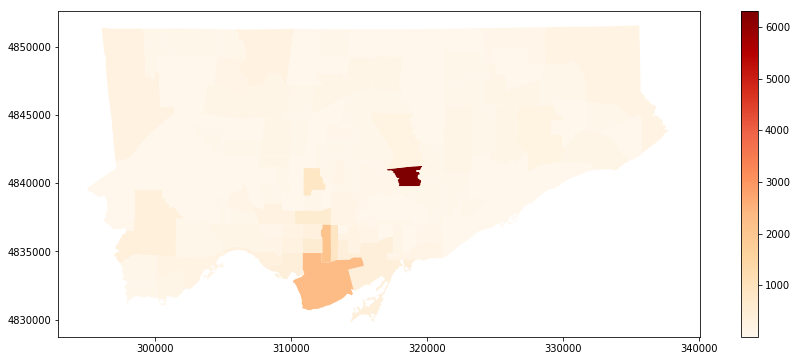

In [24]:
# create and plot a choropleth map for tweets per area 
ax = toronto.plot(column='number_of_tweets', figsize=(15,6), 
                 cmap='OrRd', legend=True)

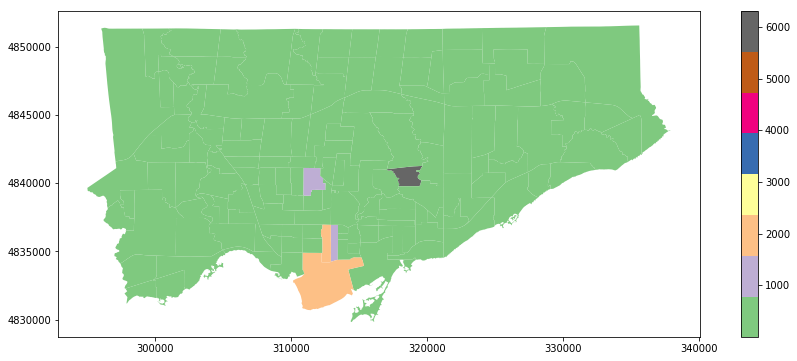

In [25]:
# apply another colour scheme
ax = toronto.plot(column='number_of_tweets', figsize=(15,6),
                 cmap='Accent', legend=True)

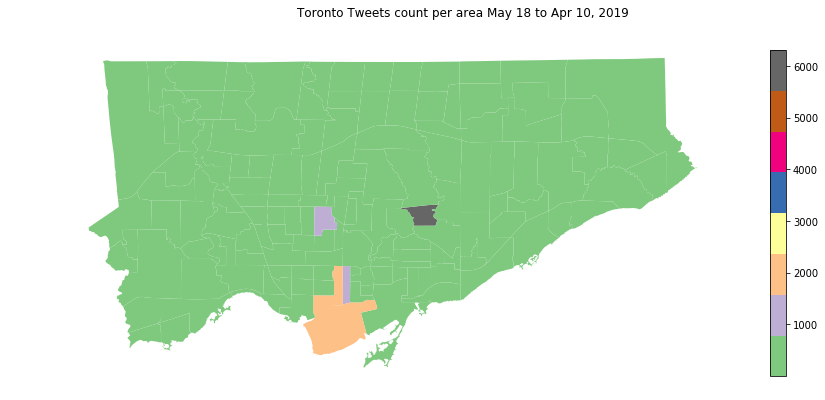

In [26]:
# tidy map, add title, drop x,y-axis
f, ax = plt.subplots(1, figsize=(15,6))
ax = toronto.plot(column='number_of_tweets', cmap='Accent',                 
                 legend=True, ax=ax)
lims = plt.axis('equal')
f.suptitle('Toronto Tweets count per area May 18 to Apr 10, 2019')                     
ax.set_axis_off()
plt.show()

In [27]:
toronto_tweets['longitude'] = toronto_tweets.coordinates.x
toronto_tweets['latitude'] = toronto_tweets.coordinates.y

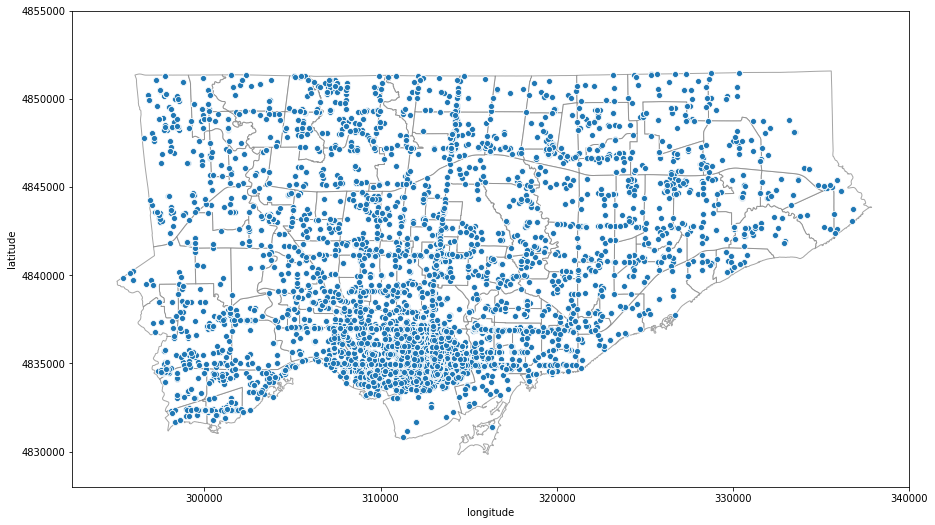

In [28]:
#plot all listings
xlim = (292500,340000)
ylim = (4828000,4855000)

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
toronto.plot(ax=ax, color='white', edgecolor='grey',alpha = 0.7,)
sns.scatterplot("longitude", "latitude", data=toronto_tweets)
plt.xlim(xlim)
plt.ylim(ylim)
plt.show()

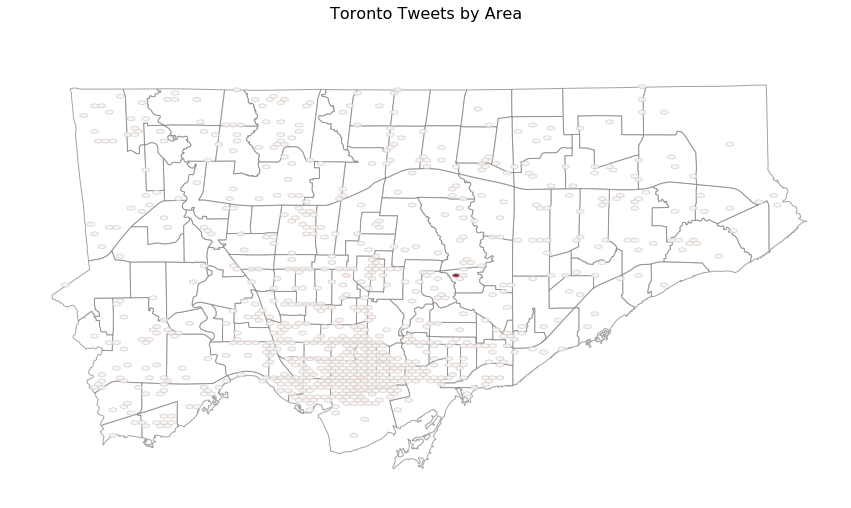

In [47]:
#this is quite busy, lets try it with a hex_bin plot
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
toronto.plot(ax=ax, color='white',edgecolor = 'grey',alpha = 0.7,)
plt.hexbin(toronto_tweets.longitude, toronto_tweets.latitude,alpha=0.8,mincnt=5,edgecolors='lightgrey',cmap='Reds' )
plt.xlim(292500,340000)
plt.ylim(4828000,4855000)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis('off')
plt.title('Toronto Tweets by Area',fontsize=16)
plt.show()

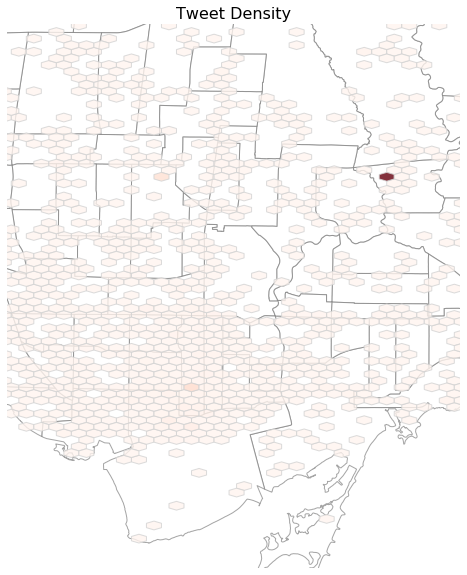

In [46]:

#Lets zoom into the downtown core
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
toronto.plot(ax=ax, color='white',edgecolor = 'grey',alpha = 0.7,)
plt.hexbin(toronto_tweets.longitude, toronto_tweets.latitude, alpha = 0.8,mincnt=1,edgecolors='lightgrey',cmap='Reds')
plt.xlim(307500,320000)
plt.ylim(4830000,4845000)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title('Tweet Density',fontsize=16)
ax.axis('off')
plt.show()

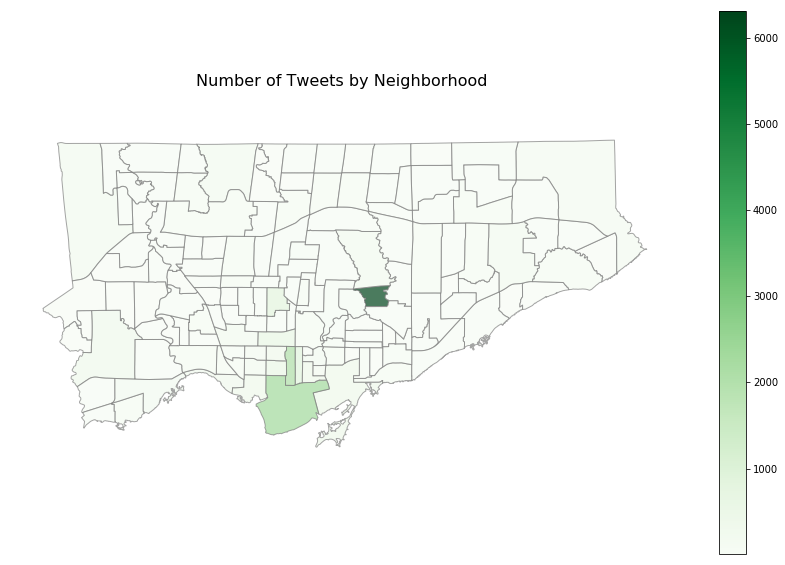

In [40]:
#
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
toronto.plot(ax=ax, column = 'number_of_tweets',edgecolor = 'grey',alpha = 0.7,cmap='Greens',legend=True)
plt.xlim(xlim)
plt.ylim(ylim)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title('Number of Tweets by Neighborhood',fontsize=16)
ax.axis('off')
plt.show()